In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !cp -R gdrive/My\ Drive/IEMOCAP_audios .
# !pip install ipyparallel

In [0]:
import librosa.core
import librosa.display
import librosa.feature
import librosa.util
import os
import re
import os.path
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ipyparallel import Client
from tqdm import tqdm


In [0]:
audio_df = pd.read_csv('gdrive/My Drive/df_iemocap.csv')
audio_df.head()
indexNames = audio_df[ audio_df['emotion'] == 'xxx' ].index

# Delete these row indexes from dataFrame
audio_df.drop(indexNames , inplace=True)
audio_df.reset_index(drop=True, inplace=True)
audio_df.head(), len(audio_df)

In [10]:
start = np.array(audio_df['start_time'])
end = np.array(audio_df['end_time'])
durations = end - start
avg_duration = np.mean(durations)
avg_duration

4.558073114710569

In [0]:
filename = audio_df['wav_file'][0]
offset = audio_df['start_time'][0]
y, sr =librosa.load(f'gdrive/My Drive/IEMOCAP_audios/Session1/{filename[:-5]}.wav',offset=offset, duration=avg_duration)

len(y)
size = len(y)

In [0]:
librosa.stft(y).shape

(1025, 197)

In [0]:

# mel_spectrograms = np.zeros((7532,128,197))
# mel_spectrograms_db = np.zeros((7532,128,197))
labels = [None]*7532
for x in tqdm(range(7532)):
  # filename = audio_df['wav_file'][x]
  # offset = audio_df['start_time'][x]
  # a, sr = librosa.load(f'IEMOCAP_audios/Session{filename[4]}/{filename[:-5]}.wav',offset=offset,duration=avg_duration)
  # if len(a)!= size:
      # a = np.pad(a, (0, size-len(a)), 'constant')
  # mel = np.abs((librosa.feature.melspectrogram(a)))
  # mel_db = librosa.power_to_db(mel, ref=np.max)
  # mel_spectrograms[x] = mel
  # mel_spectrograms_db[x] = mel_db
  labels[x] = audio_df['emotion'][x]

# labels = np.array(labels)
# np.save(labels)
# np.save('melspectrograms',mel_spectrograms)
# np.save('melspectrograms_db',mel_spectrograms_db)

100%|██████████| 7532/7532 [00:00<00:00, 98798.15it/s]


In [0]:
# !cp melspectrograms.npy gdrive/My\ Drive/
# !cp melspectrograms_db.npy gdrive/My\ Drive/

In [139]:
labels = np.array(audio_df['emotion'])
labels.shape

(7532,)

In [0]:
# mel_spectrograms = np.load('gdrive/My Drive/melspectrograms.npy')
# mel_spectrograms_db = np.load('gdrive/My Drive/melspectrograms_db.npy')
# backup_melspec = mel_spectrograms
# backup_melspec_db = mel_spectrograms_db
mel_spectrograms = backup_melspec
mel_spectrograms_db = backup_melspec_db
# len(labels)

In [53]:
labels.index('ang'), labels[1000:].index('dis')

(9, 2672)

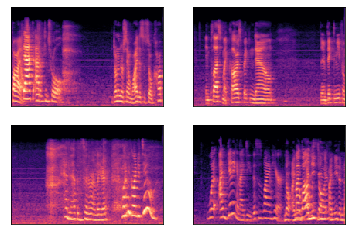

In [54]:
plt.subplot(2,2,1)
librosa.display.specshow(mel_spectrograms_db[9])
plt.subplot(2,2,2)
librosa.display.specshow(mel_spectrograms_db[1000+2672])
plt.subplot(2,2,3)
librosa.display.specshow(mel_spectrograms_db[572])
plt.subplot(2,2,4)
librosa.display.specshow(mel_spectrograms_db[4])

In [104]:
# for i in (range(7532)):
#   if labels[i] == 'oth':
#     print (i)

# del labels[554]
# del labels[1788]
# del labels[5304]

# mel_spectrograms = np.delete(mel_spectrograms,554, 0)
# mel_spectrograms = np.delete(mel_spectrograms,1788, 0)
# mel_spectrograms = np.delete(mel_spectrograms,5304, 0)

# mel_spectrograms_db =  np.delete(mel_spectrograms_db,554, 0)
# mel_spectrograms_db =  np.delete(mel_spectrograms_db,1788, 0)
# mel_spectrograms_db =  np.delete(mel_spectrograms_db,5304, 0)
labels.shape

(7532,)

In [0]:
fru = np.where(labels=='fru')[0]
dis = np.where(labels=='dis')[0]
fea = np.where(labels=='fea')[0]
sur = np.where(labels=='sur')[0]
oth = np.where(labels=='oth')[0]
to_delete = []
to_delete.extend(fru)
to_delete.extend(dis)
to_delete.extend(fea)
to_delete.extend(sur)
to_delete.extend(oth)
# to_delete

In [0]:
mel_spectrograms = np.delete(mel_spectrograms, to_delete, 0)
mel_spectrograms_db = np.delete(mel_spectrograms_db, to_delete, 0)
labels = np.delete(labels, to_delete, 0)
labels[labels == 'exc'] = 'hap'

In [144]:
set(labels)

{'ang', 'hap', 'neu', 'sad'}

In [0]:

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np.array(labels)



In [121]:
for i in range(9):
  print(i,np.count_nonzero(labels==i))


le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

0 1103
1 1636
2 1708
3 1084
4 0
5 0
6 0
7 0
8 0
{'ang': 0, 'hap': 1, 'neu': 2, 'sad': 3}


In [146]:
labels = labels.reshape(len(labels),1)
labels.shape

(5531, 1)

In [0]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(mel_spectrograms_db, labels, shuffle = True)

In [161]:
train_X.shape, train_y.shape

((4148, 128, 197), (4148, 1))

In [0]:
class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.Tensor(data)
        self.target = torch.Tensor(target)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)




train_set = MyDataset(train_X, train_y)
valid_set = MyDataset(valid_X, valid_y)

train_loader = DataLoader(
    train_set,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

valid_loader = DataLoader(
    valid_set,
    batch_size=64,
    shuffle=False,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

for batch_idx, (data, target) in enumerate(train_loader):
    print('Batch idx {}, data shape {}, target shape {}'.format(
        batch_idx, data.shape, target.shape))
    
for batch_idx, (data, target) in enumerate(valid_loader):
    print('Batch idx {}, data shape {}, target shape {}'.format(
        batch_idx, data.shape, target.shape))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 2, 2) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 2, 2) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 2, 2)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)